# Part 1. Build Two Types of Predictive Models

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn as sk
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA

In [94]:
df = pd.read_csv('salesdaily.csv')
df

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
0,1/2/2014,0.00,3.670,3.40,32.40,7.0,0.0,0.0,2.00,2014,1,248,Thursday
1,1/3/2014,8.00,4.000,4.40,50.60,16.0,0.0,20.0,4.00,2014,1,276,Friday
2,1/4/2014,2.00,1.000,6.50,61.85,10.0,0.0,9.0,1.00,2014,1,276,Saturday
3,1/5/2014,4.00,3.000,7.00,41.10,8.0,0.0,3.0,0.00,2014,1,276,Sunday
4,1/6/2014,5.00,1.000,4.50,21.70,16.0,2.0,6.0,2.00,2014,1,276,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2101,10/4/2019,7.34,5.683,2.25,22.45,13.0,0.0,1.0,1.00,2019,10,276,Friday
2102,10/5/2019,3.84,5.010,6.00,25.40,7.0,0.0,0.0,0.33,2019,10,276,Saturday
2103,10/6/2019,4.00,11.690,2.00,34.60,6.0,0.0,5.0,4.20,2019,10,276,Sunday
2104,10/7/2019,7.34,4.507,3.00,50.80,6.0,0.0,10.0,1.00,2019,10,276,Monday


## Build a Decision Tree

 Using decision tree to find the factors that effect the sales of certain drug (eg. Weekday? Months/Seasonality? Other categories' drugs?)

In [95]:
target = "M01AB"

In [96]:
le = LabelEncoder()
df["Weekday_Name_Encoded"] = le.fit_transform(df["Weekday Name"])

In [97]:
def month_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

In [98]:
df["Season"] = df["Month"].apply(month_to_season)

In [99]:
features = ["Year", "Month", "Hour", "Weekday_Name_Encoded", "Season", "M01AE", "N02BA", "N02BE", "N05B", "N05C", "R03", "R06"]

X = df[features]
y = df[target]

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [101]:
# Encode the Season column in X_train and X_test
le_season = LabelEncoder()
X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()
X_train_encoded["Season"] = le_season.fit_transform(X_train["Season"])
X_test_encoded["Season"] = le_season.transform(X_test["Season"])

In [102]:
# debug
print(X_test_encoded.shape)
print(y_test.shape)

(422, 12)
(422,)


In [103]:
#save the testing data for future use
X_test_encoded.to_csv("SavedData/X_test_dt1.csv", index=False)
y_test.to_csv("SavedData/y_test_dt1.csv", index=False)

X_test_encoded.to_csv("SavedData/X_test_dt2.csv", index=False)
y_test.to_csv("SavedData/y_test_dt2.csv", index=False)

version 1

In [104]:
dt_model1 = DecisionTreeRegressor(max_depth = 5, random_state = 42)
dt_model1.fit(X_train_encoded, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [105]:
feature_importances = pd.DataFrame({
    "Feature": features, 
    "Importance": dt_model1.feature_importances_
}).sort_values(by = "Importance", ascending = False)

feature_importances

,Feature,Importance
7,N02BE,0.448321
0,Year,0.191706
6,N02BA,0.126170
8,N05B,0.075609
11,R06,0.041637
10,R03,0.040256
5,M01AE,0.039341
1,Month,0.032145
9,N05C,0.004814
2,Hour,0.000000


/var/folders/08/y_gq7kvj36zf7tb54tsx96740000gn/T/ipykernel_39709/2427071.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Feature", y = "Importance", data=feature_importances, palette="viridis")


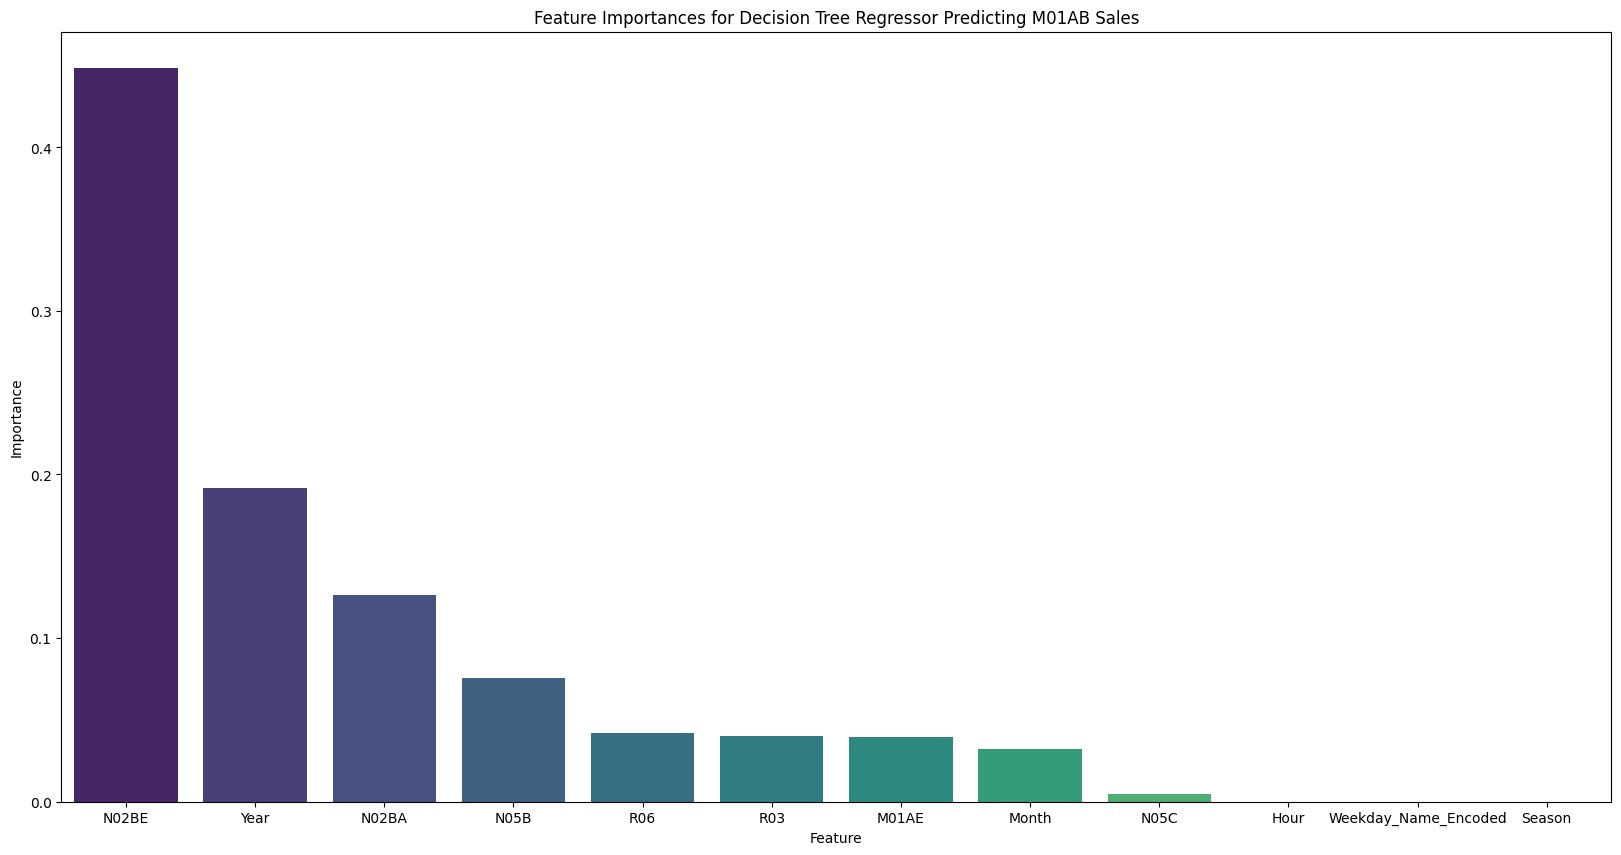

In [106]:
plt.figure(figsize = (20, 10))
sns.barplot(x="Feature", y = "Importance", data=feature_importances, palette="viridis")
plt.title(f"Feature Importances for Decision Tree Regressor Predicting {target} Sales")
plt.show()

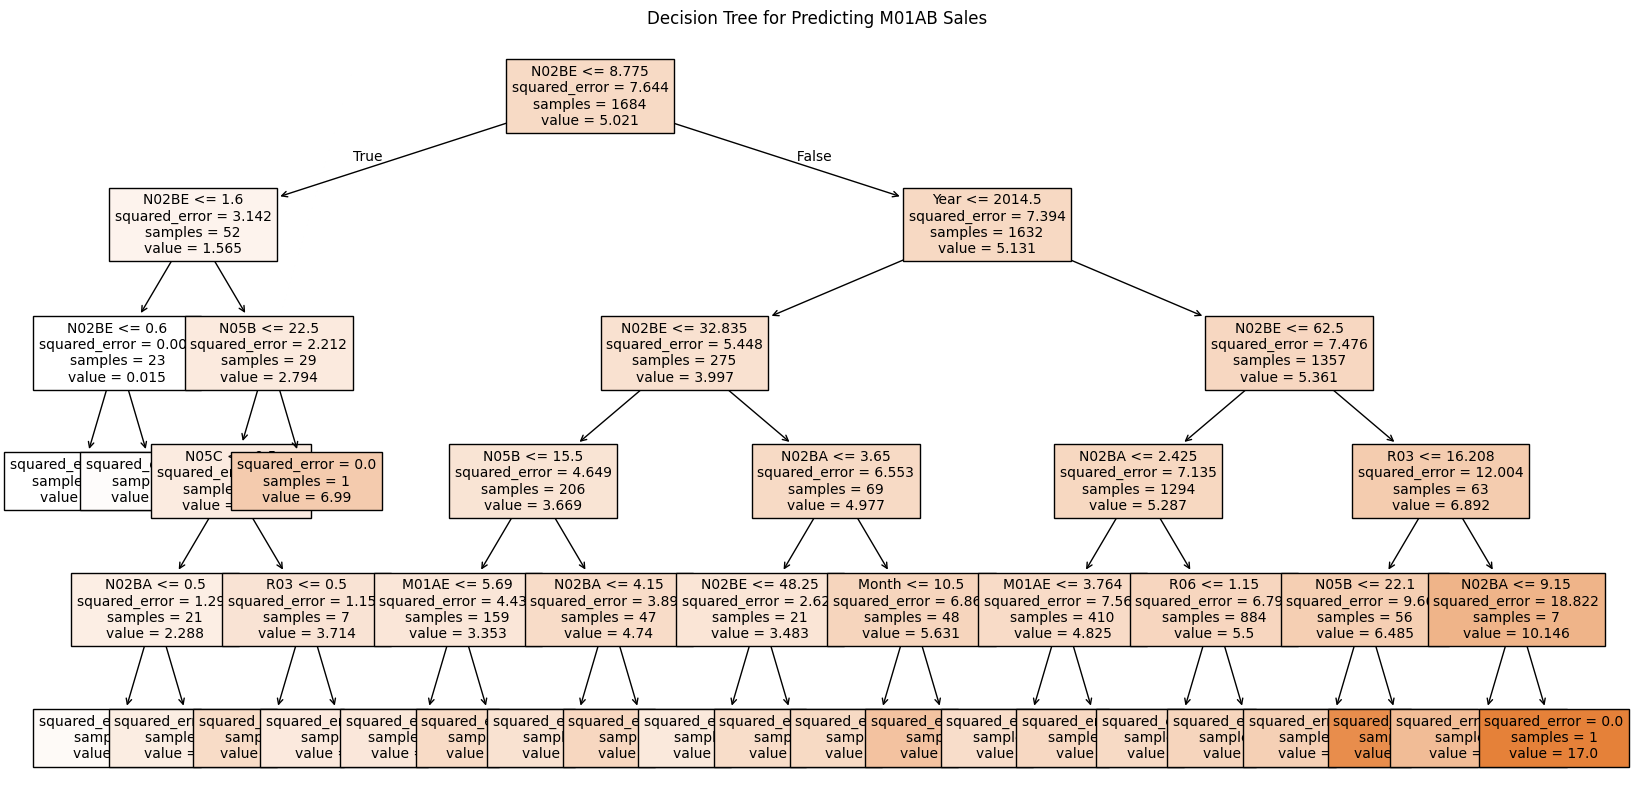

In [107]:
plt.figure(figsize = (20, 10))
plot_tree(dt_model1, feature_names = features, filled = True, fontsize = 10)
plt.title(f"Decision Tree for Predicting {target} Sales")
plt.show()

In [108]:
y_pred_v1 = dt_model1.predict(X_test_encoded)

version 2

In [109]:
dt_model2 = DecisionTreeRegressor(max_depth = 10, random_state = 42)
dt_model2.fit(X_train_encoded, y_train)

DecisionTreeRegressor(max_depth=10, random_state=42)

In [110]:
feature_importances = pd.DataFrame({
    "Feature": features, 
    "Importance": dt_model2.feature_importances_
}).sort_values(by = "Importance", ascending = False)

feature_importances

,Feature,Importance
7,N02BE,0.251516
6,N02BA,0.192916
5,M01AE,0.097690
0,Year,0.094347
8,N05B,0.089083
11,R06,0.071834
10,R03,0.069634
1,Month,0.056878
3,Weekday_Name_Encoded,0.033105
9,N05C,0.027225


/var/folders/08/y_gq7kvj36zf7tb54tsx96740000gn/T/ipykernel_39709/2427071.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Feature", y = "Importance", data=feature_importances, palette="viridis")


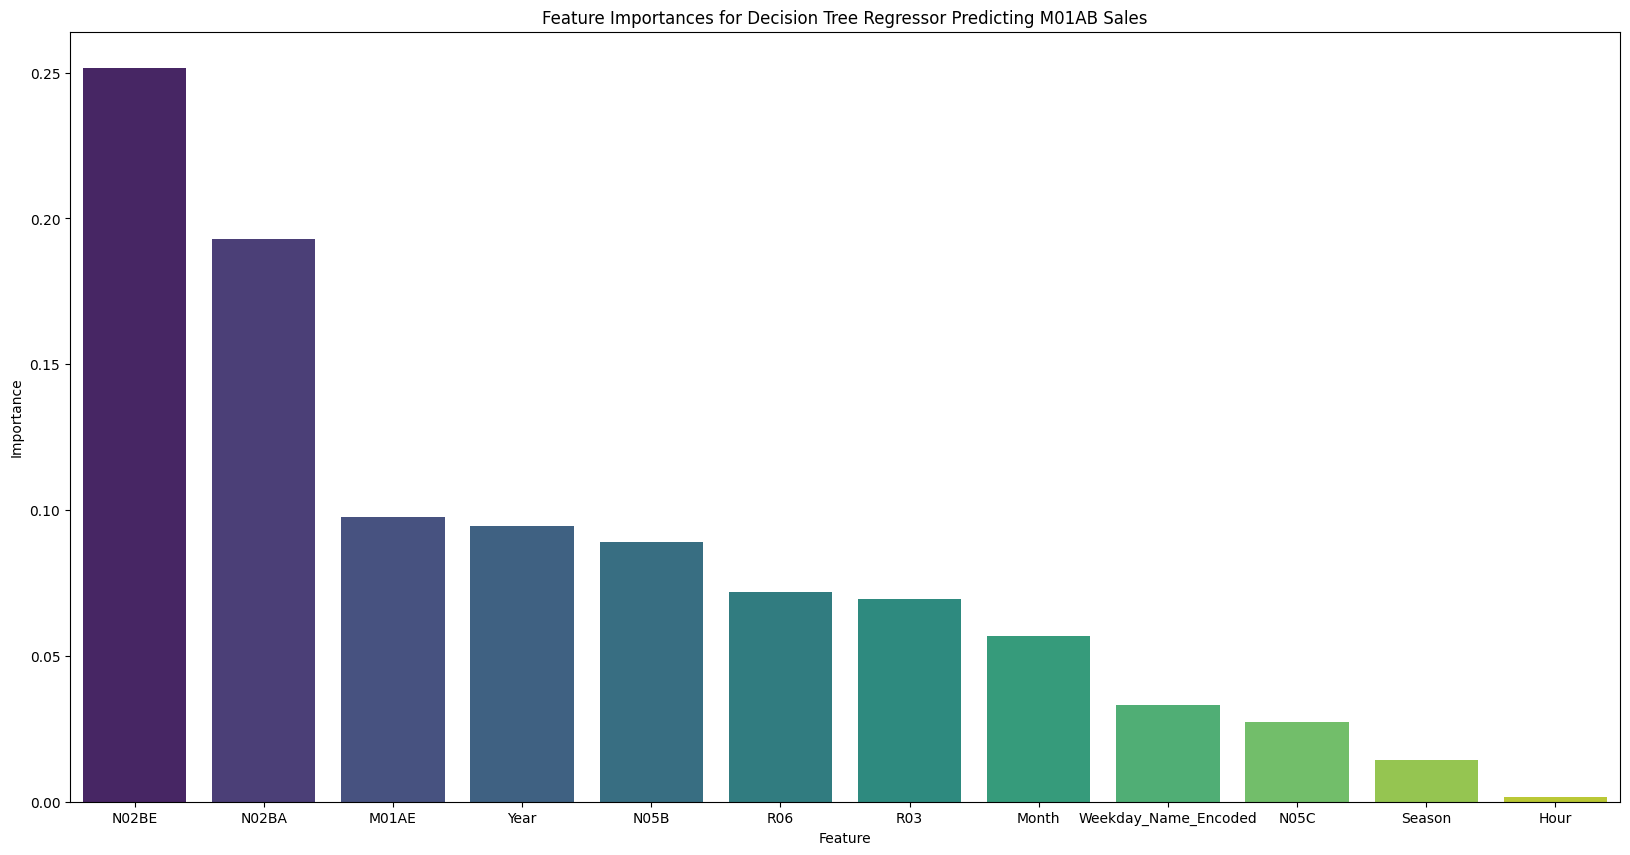

In [111]:
plt.figure(figsize = (20, 10))
sns.barplot(x="Feature", y = "Importance", data=feature_importances, palette="viridis")
plt.title(f"Feature Importances for Decision Tree Regressor Predicting {target} Sales")
plt.show()

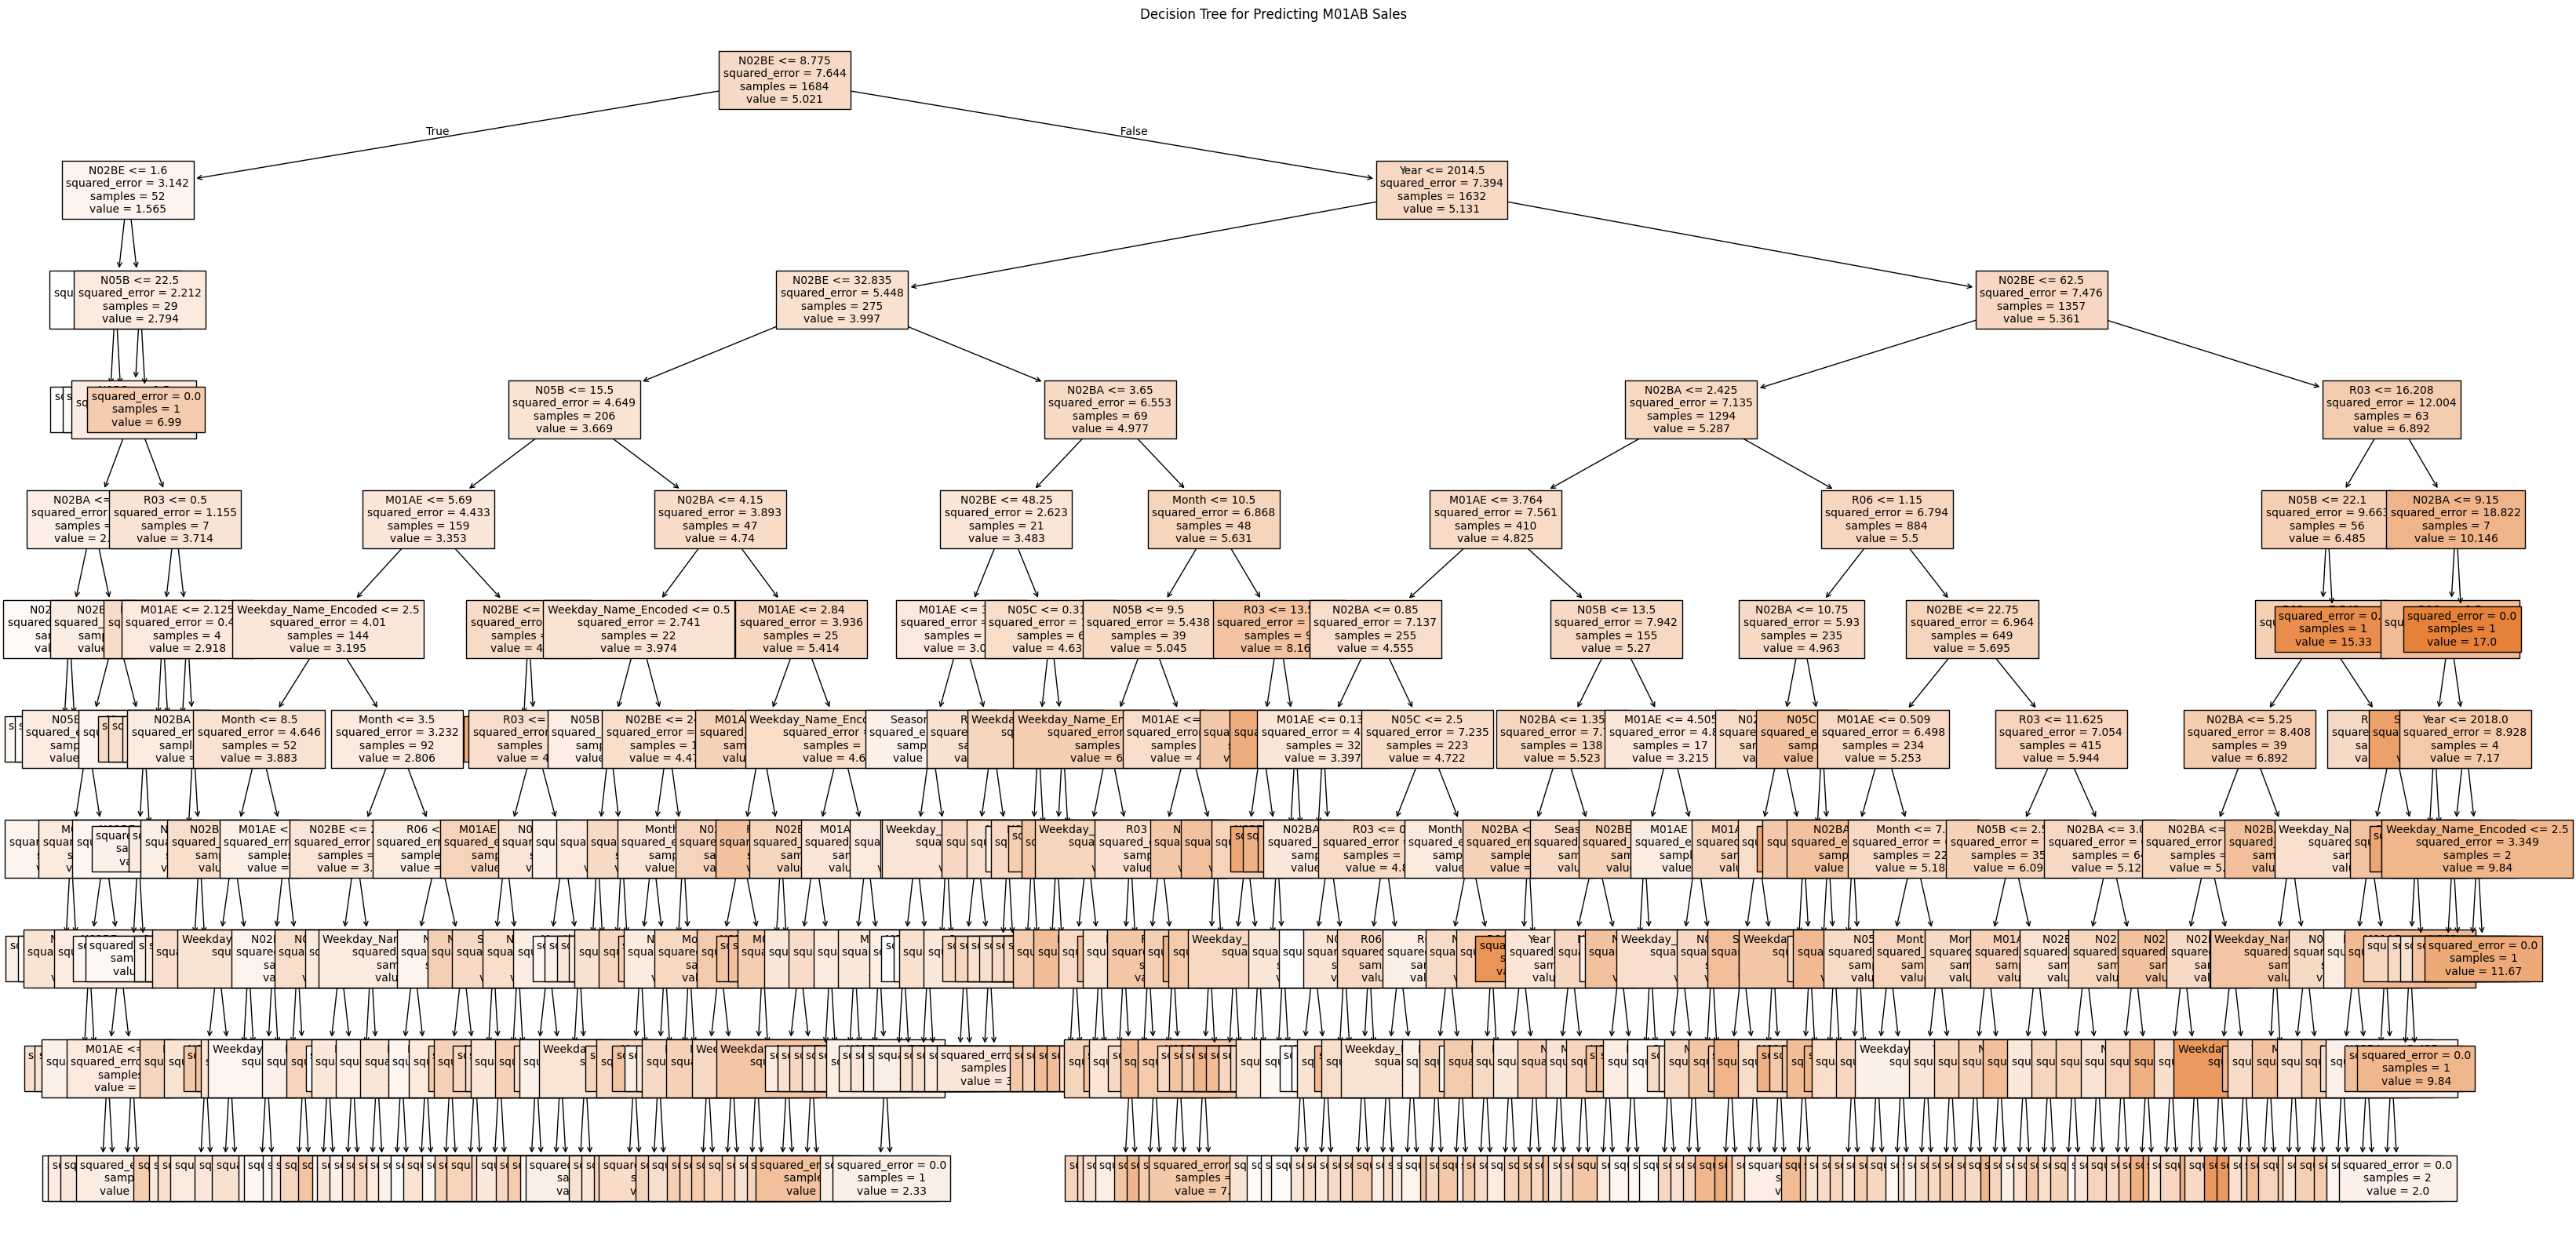

In [112]:
plt.figure(figsize = (40, 20))
plot_tree(dt_model2, feature_names = features, filled = True, fontsize = 10)
plt.title(f"Decision Tree for Predicting {target} Sales")
plt.show()

In [113]:
y_pred_v2 = dt_model2.predict(X_test_encoded)

In [114]:
comparison = pd.DataFrame({
    "Actual": y_test.values[:5],
    "Pred_V1": y_pred_v1[:5],
    "Pred_V2": y_pred_v2[:5]
})

print("Comparison of first 5 predictions:")
print(comparison)

Comparison of first 5 predictions:
   Actual   Pred_V1   Pred_V2
0    3.68  5.694915  4.330000
1    3.34  4.630833  6.775000
2    7.00  5.694915  6.224552
3    4.00  5.694915  6.224552
4    4.33  5.694915  6.224552


**Version1:**       
Captures main trends (seasonality, weekday effects), predictions are smoother, generalizes better.      
**Version2:**       
Captures more complex patterns (season-weekday-other drug interactions), may overfit.

***Comparision***
Based on the version 1, the first 5 test predictions, Version 1 (max_depth = 5) produces smoother and more stable estimates that generally follow the actual sales trends, while Version 2 (max_depth = 10) shows larger deviations and appears to overfit. Therefore, version 1 is more appropriate for predicting R06 sales.

## Multivariate Linear Regression

Using multivariate linear Regression to predict R06 future sale volumes.

***R06 was selected because its sales trend, as shown in the previous line chart, displays the clearest seasonal pattern.***

In [115]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [116]:
le = LabelEncoder()
df["Weekday_Name_Encoded"] = le.fit_transform(df["Weekday Name"])

In [117]:
def month_to_season(month):
    if month in [12, 1, 2]:
        return 0  # Winter
    elif month in [3, 4, 5]:
        return 1  # Spring
    elif month in [6, 7, 8]:
        return 2  # Summer
    else:
        return 3  # Fall

df["Season"] = df["Month"].apply(month_to_season)

##### version 1: apply all features

In [118]:
features_1 = ["Year", "Month", "Hour", "Weekday_Name_Encoded", "Season", "M01AB", "M01AE", "N02BA", "N02BE", "N05B", "N05C", "R03"]

##### version 2: apply features that relate to time

In [119]:
features_2 = ["Year", "Month", "Hour", "Weekday_Name_Encoded", "Season"]

##### version 3

all potential related features with R06

According to my previous research, R06 sales may be correlated with R03 because both are commonly used to treat allergy-related respiratory symptoms. During allergy seasons, patients often experience not only nasal symptoms that require R06 antihistamines but also lower-airway reactions such as wheezing or asthma exacerbations, which increase the need for R03 respiratory medications. As a result, the demand for both categories tends to rise and fall in similar seasonal patterns.


In [120]:
features_3 = ["Year", "Month", "Hour", "Weekday_Name_Encoded", "Season", "R03"]

In [121]:
Target = "R06"

In [122]:
X1 = df[features_1]
X2 = df[features_2]
X3 = df[features_3]
y = df[Target]

In [123]:
X_train_1, X_test_1, y_train_1, y_test = train_test_split(X1, y, test_size = 0.2, random_state = 42)
X_train_2, X_test_2, y_train_2, y_test = train_test_split(X2, y, test_size = 0.2, random_state = 42)
X_train_3, X_test_3, y_train_3, y_test = train_test_split(X3, y, test_size = 0.2, random_state = 42)

In [124]:
#dubug
print(X_test_1.shape)
print(y_test.shape)

print(X_test_2.shape)
print(y_test.shape)

print(X_test_3.shape)
print(y_test.shape)

(422, 12)
(422,)
(422, 5)
(422,)
(422, 6)
(422,)


In [125]:
#save training data for future use
X_test_1.to_csv("SavedData/X_test_lr1.csv", index=False)
y_test.to_csv("SavedData/y_test_lr1.csv", index=False)

X_test_2.to_csv("SavedData/X_test_lr2.csv", index=False)
y_test.to_csv("SavedData/y_test_lr2.csv", index=False)
X_test_3.to_csv("SavedData/X_test_lr3.csv", index=False)
y_test.to_csv("SavedData/y_test_lr3.csv", index=False)

In [126]:
lr_1 = LinearRegression()
lr_1.fit(X_train_1, y_train_1)

LinearRegression()

In [127]:
lr_2 = LinearRegression()
lr_2.fit(X_train_2, y_train_2)

LinearRegression()

In [128]:
lr_3 = LinearRegression()
lr_3.fit(X_train_3, y_train_3)

LinearRegression()

In [129]:
y_pred_1 = lr_1.predict(X_test_1)

In [130]:
y_pred_2 = lr_2.predict(X_test_2)

In [131]:
y_pred_3 = lr_3.predict(X_test_3)

In [132]:
rmse_1 = np.sqrt(np.mean((y_test - y_pred_1) ** 2))
r2_1 = r2_score(y_test, y_pred_1)

rmse_2 = np.sqrt(np.mean((y_test - y_pred_2) ** 2))
r2_2 = r2_score(y_test, y_pred_2)

rmse_3 = np.sqrt(np.mean((y_test - y_pred_3) ** 2))
r2_3 = r2_score(y_test, y_pred_3)

In [133]:
print(f"Version 1 RMSE on test set: {rmse_1:.2f}")
print(f"Version 1 R^2 on test set: {r2_1:.2f}")
print(f"Version 2 RMSE on test set: {rmse_2:.2f}")
print(f"Version 2 R^2 on test set: {r2_2:.2f}")
print(f"Version 3 RMSE on test set: {rmse_3:.2f}")
print(f"Version 3 R^2 on test set: {r2_3:.2f}")

Version 1 RMSE on test set: 2.22
Version 1 R^2 on test set: 0.10
Version 2 RMSE on test set: 2.24
Version 2 R^2 on test set: 0.08
Version 3 RMSE on test set: 2.24
Version 3 R^2 on test set: 0.08


In [134]:
comparison_lr = pd.DataFrame({
    "Actual": y_test.values[:5],
    "Pred_V1": y_pred_1[:5],
    "Pred_V2": y_pred_2[:5]
})

print ("Comparison of first 5 predictions for Linear Regression:")
print(comparison_lr)

Comparison of first 5 predictions for Linear Regression:
   Actual   Pred_V1   Pred_V2
0     2.0  1.767173  1.378829
1     0.0  0.067756  0.677956
2     4.0  3.325912  3.042319
3     4.0  3.298163  3.524057
4     3.0  2.971062  3.138011


##### version 4 Apply Time and Lagged Sales Features

In [135]:
#create lag features (seasonality)
df["R06_lag_1"] = df["R06"].shift(1)
df["R06_lag_7"] = df["R06"].shift(7)
df["R06_lag_30"] = df["R06"].shift(30)

In [136]:
# rolling averages for smoothing
df["R06_roll_7"] = df["R06"].rolling(window=7).mean()
df["R06_roll_30"] = df["R06"].rolling(window=30).mean()

In [137]:
df = df.dropna()

In [138]:
#cyclical month encoding
df["Month_sin"] = np.sin(2 * np.pi * df["Month"] / 12)
df["Month_cos"] = np.cos(2 * np.pi * df["Month"] / 12)

/var/folders/08/y_gq7kvj36zf7tb54tsx96740000gn/T/ipykernel_39709/2341057249.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Month_sin"] = np.sin(2 * np.pi * df["Month"] / 12)
/var/folders/08/y_gq7kvj36zf7tb54tsx96740000gn/T/ipykernel_39709/2341057249.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Month_cos"] = np.cos(2 * np.pi * df["Month"] / 12)


In [139]:
features_4 = [
    "Year", "Hour",
    "Month_sin", "Month_cos",
    "R06_lag_1", "R06_lag_7", "R06_lag_30",
    "R06_roll_7", "R06_roll_30"
]

In [140]:
X_4 = df[features_4]
y = df["R06"]

In [141]:
X_train_4, X_test_4, y_train, y_test = train_test_split(
    X_4, y, test_size = 0.2, random_state = 42
)

In [142]:
print(X_test_4.shape)
print(y_test.shape)

(416, 9)
(416,)


In [143]:
#save training data for future use
X_test_4.to_csv("SavedData/X_test_lr4.csv", index=False)
y_test.to_csv("SavedData/y_test_lr4.csv", index=False)

In [144]:
lr_4 = LinearRegression()
lr_4.fit(X_train_4, y_train)

LinearRegression()

In [145]:
y_pred_4 = lr_4.predict(X_test_4)

In [146]:
rmse_4 = np.sqrt(np.mean((y_test - y_pred_4) ** 2))
r2_4 = r2_score(y_test, y_pred_4)

In [147]:
print(f"Version 4 RMSE on test set: {rmse_4:.2f}")
print(f"Version 4 R^2 on test set: {r2_4:.2f}")

Version 4 RMSE on test set: 1.92
Version 4 R^2 on test set: 0.41


In [148]:
comparison_4 = pd.DataFrame({
    "Actual": y_test.values[:5],
    "Pred_3": y_pred_4[:5]
})

print("\nFirst 5 predictions for Version 3:")
print(comparison_4)


First 5 predictions for Version 3:
     Actual    Pred_3
0  2.200000  2.445442
1  2.291667  2.473940
2  1.000000  1.595483
3  1.000000  1.296938
4  3.000000  2.876476


In my Version 4, the prediction performance is significantly improved compared to Versions 1 and 2. By introducing lagged values, rolling averages, and cyclical month encoding, the model can better capture the clear seasonal and temporal patterns in R06 sales. As a result, the R^2 score increases from around 0.08–0.10 in Versions 1 and 2 to 0.41, and the RMSE decreases from approximately 2.22–2.24 to 1.92, showing a notable improvement in predictive accuracy.

#### Describe the parameter differences and why I selected them
For the version 1, I used the original features with default linear regression. This served as a baseline to evaluate how well the basic features could predict R06 sales.         
Since the prediction results for version 1 were not very good, in the version 2, I focused on features that related to time and removed other drug categories.         
However, the result of version 2 were similiar to version 1. By reviewing the line chart of R06 in my previous notebook(2_EDA), I ovserved that R06 exhibits cyclical changes over the year. Therefore, in version 3, I added lagged sales, rolling averages, and cyclical month encoding to better capture R06's seasonal patterns. 

# Part 2. PCA (Principal Component Analysis)

In [149]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [150]:
df= pd.read_csv('/Users/weirong/Documents/25Fall/Introduction to Data Science/Project/salesdaily.csv')

In [151]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_4)
X_test_scaled = scaler.transform(X_test_4) #get the normalized testing data

In [152]:
#debug
X_test_scaled

array([[-1.47733822,  0.02455143, -0.01077322, ..., -1.20777564,
        -0.44083935, -0.88452527],
       [ 0.33342829,  0.02455143,  0.69351657, ..., -0.38157534,
        -0.27216313, -0.82623298],
       [-0.27016055,  0.02455143,  1.20909247, ..., -0.38157534,
        -0.65484266, -0.74603216],
       ...,
       [-0.27016055,  0.02455143,  0.69351657, ...,  1.27082525,
        -0.83317876, -1.12395404],
       [ 0.93701713,  0.02455143,  1.20909247, ..., -0.79467549,
        -1.18985094, -0.90893762],
       [-0.87374938,  0.02455143, -1.41935279, ...,  0.03152481,
        -0.29817047, -0.12398684]])

In [153]:
pca = PCA(n_components=0.80)  # Retain 95% of variance
pca.fit(X_train_scaled)

PCA(n_components=0.8)

In [154]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

In [155]:
cumulative_variance

array([0.42109737, 0.54938704, 0.66391517, 0.76641077, 0.84461403])

In [156]:
n_components_80 = np.argmax(cumulative_variance >= 0.80) + 1
print(f"Number of components to retain 80% variance: {n_components_80}")

Number of components to retain 80% variance: 5


Therefore, this dataset need ***5*** components to reach 80% variance (84.461403%)

#### Using Linear Regression model on the transformed training data

Transformed Data

In [157]:
pca_final = PCA(n_components= 5)
X_train_pca = pca_final.fit_transform(X_train_scaled)
X_test_pca = pca_final.transform(X_test_scaled)

Using Transformed Data to Train Model

In [158]:
pca_model = LinearRegression()
pca_model.fit(X_train_pca, y_train) #using the transformed data to train model

LinearRegression()

In [159]:
y_pred = pca_model.predict(X_test_pca)

In [160]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
rmse = round(rmse, 4)
r2 = round(r2, 4)

print("RMSE:", rmse)
print("R^2:", r2)

RMSE: 2.0742
R^2: 0.3098


I applied PCA to reduce the dimensionality of my features before fitting a linear regression model. After transforming the training and test data, the model's performance remained largely unchanged: the RMSE was 1.918 (previously 1.92) and R^2 was 4.096 (previously 4.1). This small difference indicates that PCA did not significantly affect the model, likely because the original feature set was relatively small and the features were not highly correlated. PCA may be more useful in cases with many features or strong multicollinearity.

# Part 3. Written Reflection (Short Paragraph)

Through this project, I learned how model construction and parameter choices can influence predictive performance. Experimenting with the decision tree, I observed how changing max_depth affected the model’s ability to identify important factors influencing M01AB sales. In linear regression, I found that time-related features alone had some predictive power, and including lagged sales features alongside them further improved predictions for R06, highlighting the importance of thoughtful feature selection. One of the challenges I faced was finding a suitable model to train the data and then further optimizing it; for example, in multivariate linear regression, I started by applying all features without considering their relevance, which gave modest results. Then I focused on time-related features to capture R06 seasonality, but performance remained limited. Next, I added potentially influential features, like R03 sales, and finally combined time-related and lagged sales features. This iterative feature selection led to a noticeable improvement in RMSE and R^2, reflecting a structured modeling process. Using PCA to reduce dimensionality was interesting, but I was surprised that transforming the features did not significantly change the model’s RMSE or R^2, likely because the original feature set was already small and informative.

### Save Trained Model for future use

In [161]:
import joblib

joblib.dump(dt_model1, "SavedModels/decision_tree_model1_depth=5.pkl")
joblib.dump(dt_model2, "SavedModels/decision_tree_model2_depth=10.pkl")

joblib.dump(lr_1, "SavedModels/linear_regression_model1_AllFeatures.pkl")
joblib.dump(lr_2, "SavedModels/linear_regression_model2_FeaturesRelatedToTime.pkl")
joblib.dump(lr_3, "SavedModels/linear_regression_model3_FeaturesRelatedToR06.pkl")
joblib.dump(lr_4, "SavedModels/linear_regression_model4_ApplyTimeandLaggedSalesFeatures.pkl")

joblib.dump(scaler, "SavedModels/scaler.pkl")
joblib.dump(pca_final, "SavedModels/pca_final.pkl")
joblib.dump(pca_model, "SavedModels/pca_regression_model.pkl")

['SavedModels/pca_regression_model.pkl']

In [162]:
# save raw testing data for future use
X_test_4.to_csv("SavedData/X_test_pca_raw.csv", index=False)
y_test.to_csv("SavedData/y_test_pca_raw.csv", index=False)

# save after sclaer.transform() data for future use
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=features_4)
X_test_scaled_df.to_csv("SavedData/X_test_pca_scaled.csv", index=False)
y_test.to_csv("SavedData/y_test_pca_scaled.csv", index=False)

# save pca transformed data for future use
X_test_pca_df = pd.DataFrame(X_test_pca, columns=[f"PC{i+1}" for i in range(X_test_pca.shape[1])])
X_test_pca_df.to_csv("SavedData/X_test_pca_transformed.csv", index=False)
y_test.to_csv("SavedData/y_test_pca_transformed.csv", index=False)